## 1.	Geometric Transforms using inbuilt functions.

In [6]:
import matplotlib.pyplot as plt
from skimage.transform import warp
from skimage import data
from skimage.transform import SimilarityTransform
from skimage import data
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

#### a)	Translation:

In [ ]:
img = data.camera()  


#### 	Translate the input image by βx and βy = (30, -10)

Original Image : 



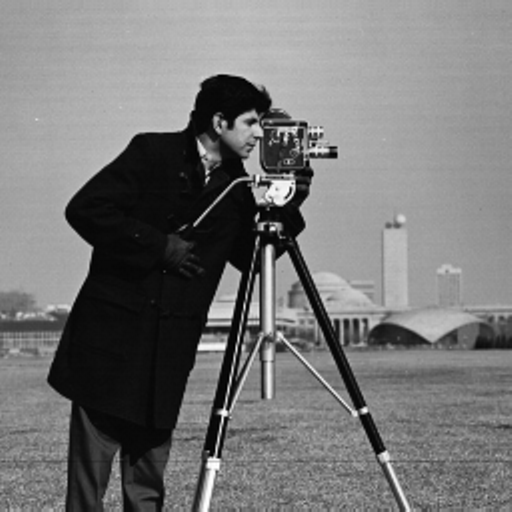


After apllying Translation



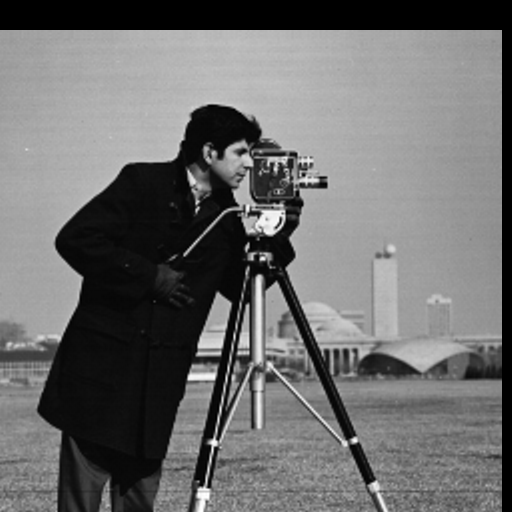

In [ ]:
height, width = img.shape[:2]   
n_height, n_width = 30, -10  
T = np.float32([[1, 0, n_width], [0, 1, n_height]])   
img_translation = cv2.warpAffine(img, T, (width, height)) 
print("Original Image : ")
print()
cv2_imshow(img) 
print()
print("After apllying Translation")
print()
cv2_imshow(img_translation) 
cv2.waitKey() 
cv2.destroyAllWindows() 

##### 	Translate the input image by (30, 10)

Original Image : 



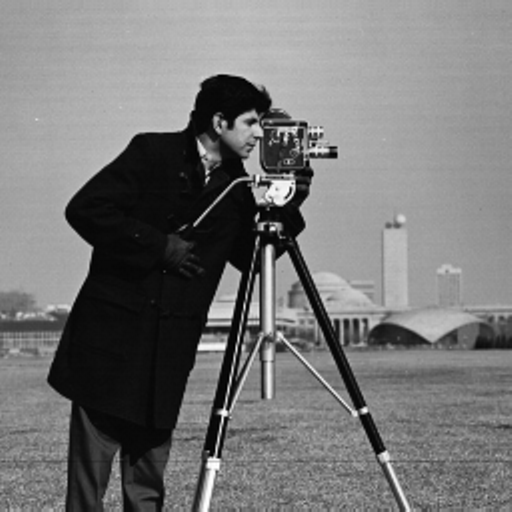


After apllying Translation



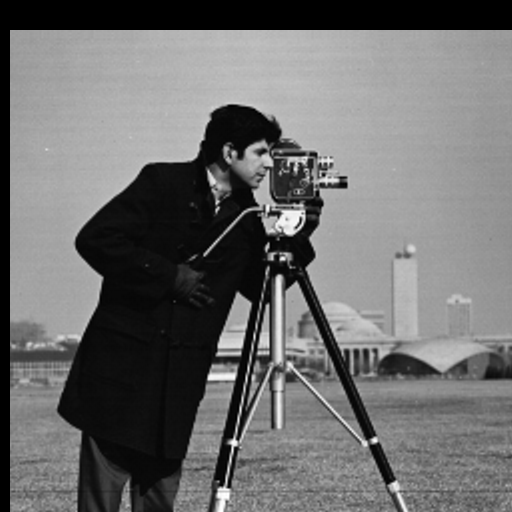

In [ ]:
height, width = img.shape[:2] 
  
n_height, n_width = 30, 10
  
T = np.float32([[1, 0, n_width], [0, 1, n_height]]) 
img_translation = cv2.warpAffine(img, T, (width, height)) 
print("Original Image : ")
print()
cv2_imshow(img) 
print()
print("After apllying Translation")
print()
cv2_imshow(img_translation) 
cv2.waitKey() 
cv2.destroyAllWindows() 

### b)	Scale, rotation, translation 

#### Scaling

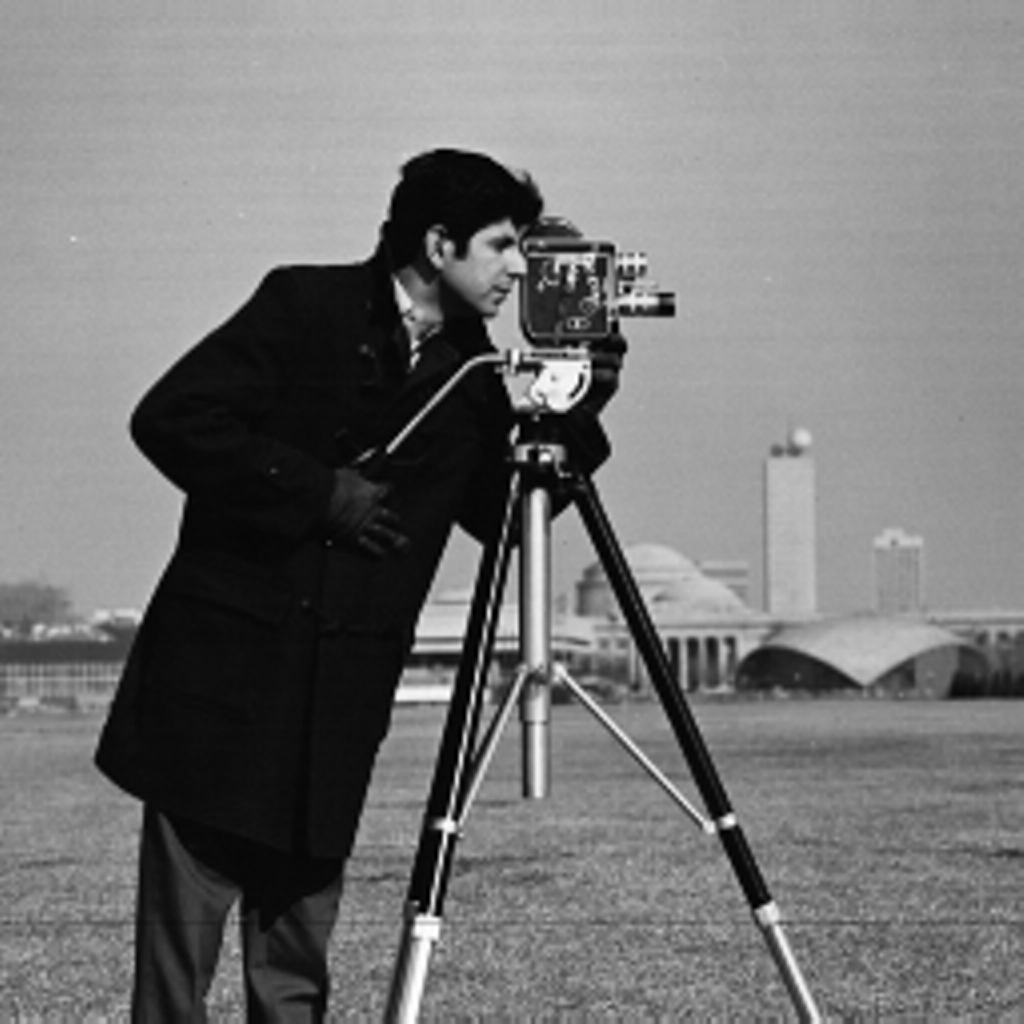

In [ ]:
height, width = img.shape[:2]
res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)
cv2_imshow(res)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Rotation

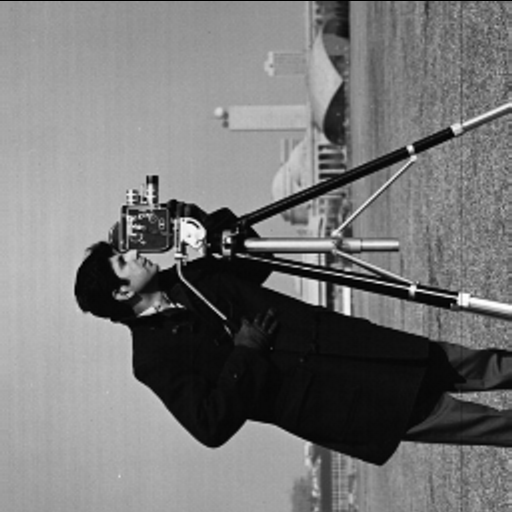

In [ ]:
img = data.camera()
rows,cols = img.shape
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst = cv2.warpAffine(img,M,(cols,rows))
cv2_imshow(dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Translation

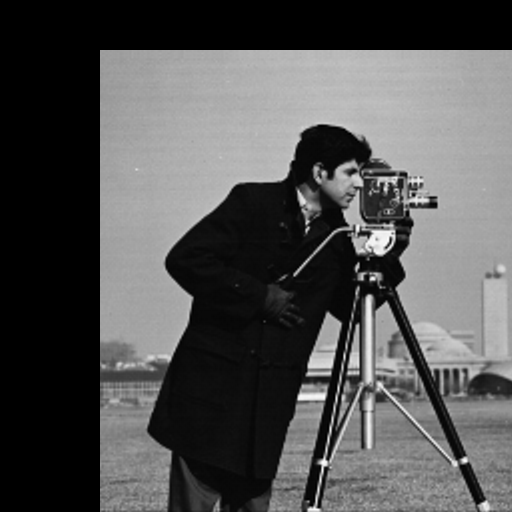

In [ ]:
M= np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img,M,(cols,rows))
cv2_imshow(dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 2.	Perform the following geometric transforms without using inbuilt functions.

### a)	Apply the horizontal shear (shear parallel to the x axis) on the image with shear factor = 2. It converts the coordinates from (x,y) to the point (x+my, y) where m is the shear factor.

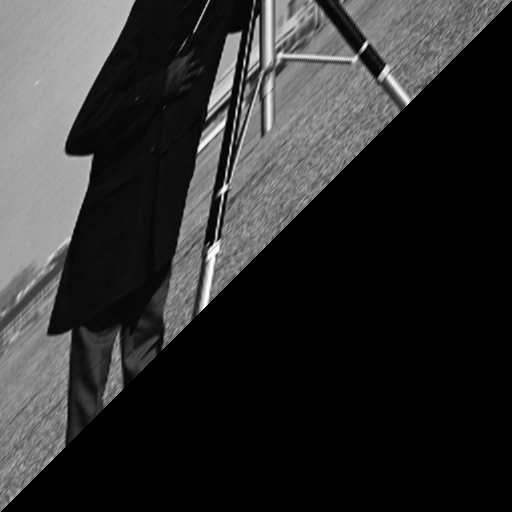

In [ ]:
img = data.camera()
rows = img.shape[0]
cols = img.shape[1]
shear_factor = 1
for i in range(rows):
  for j in range(cols):
    if((i + shear_factor*j) >= 512):
      img[i,j] = 0
    else:
      img[i,j] = img[i + shear_factor*j,j]
cv2_imshow(img)

### b)	Apply the vertical shear (shear parallel to the y axis) on the image with shear factor = 3. It converts the coordinates from (x,y) to the point (x, mx+y) where m is the shear factor.

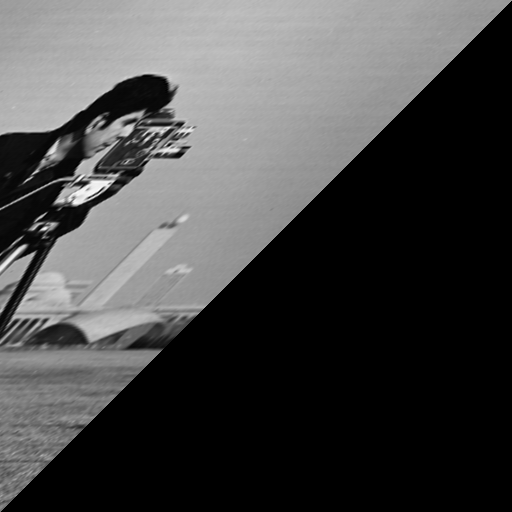

In [ ]:
img = data.camera()
rows = img.shape[0]
cols = img.shape[1]
shear_factor = 1
for i in range(rows):
  for j in range(cols):
    if((shear_factor*i + j) >= 512):
      img[i,j] = 0
    else:
      img[i,j] = img[i,shear_factor*i +j]
cv2_imshow(img)

## 3.	Add salt and pepper noise to your input image using inbuilt function in Matlab/Python

In [13]:
import numpy as np
import random
import cv2

def sp_noise(image,prob):
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

image = cv2.imread('einstein.jpg',0) # Only for grayscale image
noise_img = sp_noise(image,0.05)
cv2.imwrite('noise.png', noise_img)


True

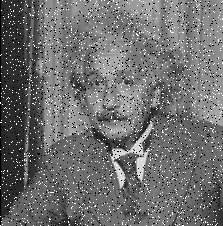

In [14]:
cv2_imshow(noise_img)

### Write a program to implement spatial domain median filter to remove salt and pepper noise without using inbuilt functions. For every 3X3 area, find the median of the pixels and replace the center pixel by the median. 

In [15]:
import cv2 
import numpy as np  
img_noisy1 = cv2.imread('noise.png', 0) 
m, n = img_noisy1.shape  
img_new1 = np.zeros([m, n]) 
for i in range(1, m-1): 
    for j in range(1, n-1): 
        temp = [img_noisy1[i-1, j-1], 
               img_noisy1[i-1, j], 
               img_noisy1[i-1, j + 1], 
               img_noisy1[i, j-1], 
               img_noisy1[i, j], 
               img_noisy1[i, j + 1], 
               img_noisy1[i + 1, j-1], 
               img_noisy1[i + 1, j], 
               img_noisy1[i + 1, j + 1]] 
          
        temp = sorted(temp) 
        img_new1[i, j]= temp[4] 
  
img_new1 = img_new1.astype(np.uint8) 
cv2.imwrite('median_filtered.png', img_new1)

True

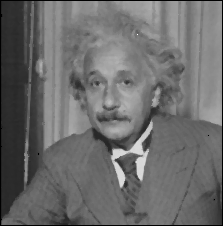

In [16]:
cv2_imshow(img_new1)

### Apply mean filtering as well on noisy image and find out which filter gives better result for salt and pepper noise.

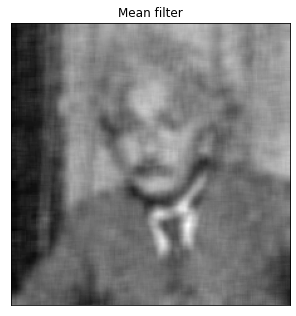

In [17]:
imgm = cv2.imread('noise.png', 0)
figure_size = 9
new_image = cv2.blur(imgm,(figure_size, figure_size))
plt.figure(figsize=(11,6))
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Mean filter')
plt.xticks([]), plt.yticks([])
plt.show()